# Libraries and Functions

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime 

In [2]:
sns.set()

### Utility Functions

In [2]:
def create_df_regioni(days):
    df = pd.DataFrame()
    for i in days:
        url =  f'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-2020{i}.csv'
  #df.append(pd.read_csv(url, encoding= 'Latin'))dpc-covid19-ita-regioni
        df = pd.concat([df,pd.read_csv(url, encoding="Latin")])
        df.data = pd.to_datetime(df.data , yearfirst=True)
        df = df[df['codice_regione'].map(lambda x :len(str(x)) < 3)]
    #rename regions
        df['denominazione_regione'] = df['denominazione_regione'].mask(df['denominazione_regione']=='P.A. Bolzano', 'Trentino-Alto Adige')
        df['denominazione_regione'] = df['denominazione_regione'].mask(df['denominazione_regione']=='P.A. Trento', 'Trentino-Alto Adige')
    return df

In [3]:
def create_regioni_shape():
    regioni_url = 'https://gist.github.com/datajournalism-it/48e29e7c87dca7eb1d29/raw/2636aeef92ba0770a073424853f37690064eb0ea/regioni.geojson'
    regioni = gpd.read_file(regioni_url)
    regioni.rename(columns={'NOME_REG':'denominazione_regione'},inplace=True)
    return regioni

population size of italian regions as to 2019 , source : https://it.wikipedia.org/wiki/Regioni_d%27Italia

In [4]:
#pd.read_table('https://it.wikipedia.org/wiki/Regioni_d%27Italia',encoding = 'latin')
def create_popolazione():
    'populate regions'
    popolazione = "Lombardia,Lazio,Campania,Sicilia,Veneto,Emilia-Romagna,Piemonte,Puglia,Toscana,Calabria,Sardegna,Liguria,Marche,Abruzzo,Friuli Venezia Giulia,Trentino-Alto Adige,Umbria,Basilicata,Molise,Valle d'Aosta".split(',')
    nu = [10060574,5879082,5801692,4999891,4905854,4459477,4356406,4029053,3729641,1947131,1639591,1550640,1525271,1311580,1215220,1072276,882015,562869,305617,125666]
    popolazione = dict(zip(popolazione,nu))
    return pd.Series(popolazione, name = 'popolazione' )

In [5]:
def create_italy():
    '''merge population and regions shape'''
    italy = shape_.merge(pd.DataFrame(popolazione).reset_index(),left_on = 'denominazione_regione' , right_on = 'index')
    italy.drop('index',axis = 1 , inplace = True)
    return italy

In [6]:
def update_regioni(regioni , today):
    daterange = pd.date_range(start = regioni.data.iloc[-1],end=today)
    days = []

    for x in daterange:
        dd = '0'+str(x.day)
        mm = '0'+str(x.month)
        days.append(mm[-2:]+dd[-2:])
    
    df = pd.DataFrame()
    for i in days:
        url =  'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-2020{}.csv'.format(i)
    #df.append(pd.read_csv(url, encoding= 'Latin'))dpc-covid19-ita-regioni
        df = pd.concat([df,pd.read_csv(url, encoding="Latin")])
        df.data = pd.to_datetime(df.data , yearfirst=True)
        df = df[df['codice_regione'].map(lambda x :len(str(x)) < 3)]
    #rename regions
        df['denominazione_regione'] = df['denominazione_regione'].mask(df['denominazione_regione']=='P.A. Bolzano', 'Trentino-Alto Adige')
        df['denominazione_regione'] = df['denominazione_regione'].mask(df['denominazione_regione']=='P.A. Trento', 'Trentino-Alto Adige')
    regioni = pd.concat([regioni,df],axis = 0)    
    return regioni

# Data

### Load Data Set

In [7]:
regioni = pd.read_csv('covid_regioni.csv')
italy = pd.read_csv('italy.csv')
italy = italy.iloc[:,1:]

update :
    

In [ ]:
regioni = update_regioni(regioni , '20201122')
regioni.to_csv('covid_regioni.csv')

if data not on disk create :

In [53]:
shape_ = create_regioni_shape()
popolazione = create_popolazione()
italy = create_italy()

In [54]:
italy.head()

,denominazione_regione,geometry,popolazione
0,Piemonte,"MULTIPOLYGON (((8.44976 46.46176, 8.46176 46.4...",4356406
1,Valle d'Aosta,"MULTIPOLYGON (((7.58857 45.97075, 7.58981 45.9...",125666
2,Lombardia,"MULTIPOLYGON (((10.24930 46.61838, 10.25429 46...",10060574
3,Trentino-Alto Adige,"MULTIPOLYGON (((12.20554 47.08637, 12.20667 47...",1072276
4,Veneto,"MULTIPOLYGON (((12.50591 46.67839, 12.50603 46...",4905854


In [12]:
italy.to_csv('italy.csv')

date range

In [6]:
daterange = pd.date_range(start = '20200306',end='20201105')
days = []
dd = ''
dd = ''
for x in daterange:
    dd = '0'+str(x.day)
    mm = '0'+str(x.month)
    days.append(mm[-2:]+dd[-2:])

If this file does not exist 

In [20]:
%%time
df_regioni = create_df_regioni(days)

Wall time: 3min 30s


In [21]:
df_regioni.to_csv('covid_regioni.csv')

### Explore data

In [8]:
regioni.max()

Unnamed: 0                                       20
data                            2020-11-22 17:00:00
stato                                           ITA
codice_regione                                   22
denominazione_regione                        Veneto
lat                                         46.4993
long                                        16.8674
ricoverati_con_sintomi                        12077
terapia_intensiva                              1381
totale_ospedalizzati                          13328
isolamento_domiciliare                       155066
totale_positivi                              164406
variazione_totale_positivi                    10263
nuovi_positivi                                11489
dimessi_guariti                              186680
deceduti                                      20524
casi_da_sospetto_diagnostico                 276322
casi_da_screening                             95288
totale_casi                                  371610
tamponi     

In [9]:
regioni.describe().loc[['mean','std','max'],['nuovi_positivi','terapia_intensiva','deceduti','dimessi_guariti']]

,nuovi_positivi,terapia_intensiva,deceduti,dimessi_guariti
mean,251.097022,50.787587,1446.565186,8158.462101
std,785.112152,129.223418,3307.061468,16047.424596
max,11489.000000,1381.000000,20524.000000,186680.000000


In [12]:
#regioni.data = pd.to_datetime(regioni.data)
#regioni.set_index('data',inplace = True)

# Charts : Hospitalized , New Positive , Deceised , Dismissed

### Hositalized

In [8]:
def barchart(title = 'nuovi_positivi' , color_map = 'viridis'):
    data = regioni.groupby('data')[title].sum() 
    
    clr = sns.color_palette(color_map , n_colors =1+ data.values.max())
    colors = [clr[x] for x in data.values]
    labels = [x[8:10]+x[4:7] for x in data.index[[30*i for i in range(1+(data.shape[0]//30))]]]
    fg , ax = plt.subplots(figsize = (16,5))
    #plt.xticks(ticks= [31*x for x in range(0,1+ospedalizzati.shape[0]//31)],rotation = 45)
    plt.grid(color = 'grey')
    plt.xticks([30*i for i in range(1+(data.shape[0]//30))] , labels=labels)
    plt.bar(data.index , data.values, width = 1.0 , color = colors)
    plt.title(label= title , fontdict ={'fontsize':'xx-large'})

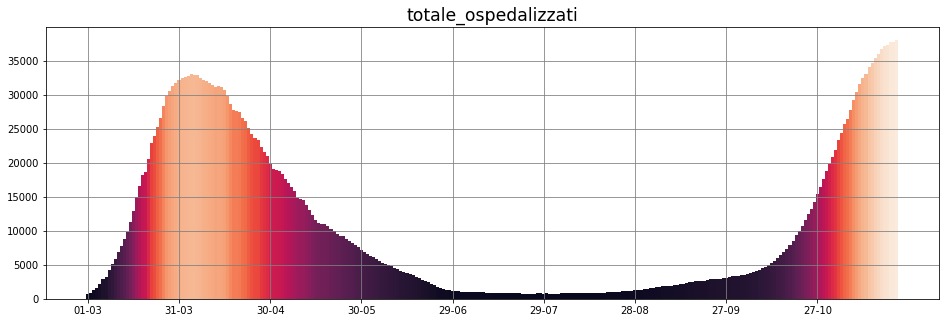

In [9]:
barchart('totale_ospedalizzati',  'rocket')

### New Positives

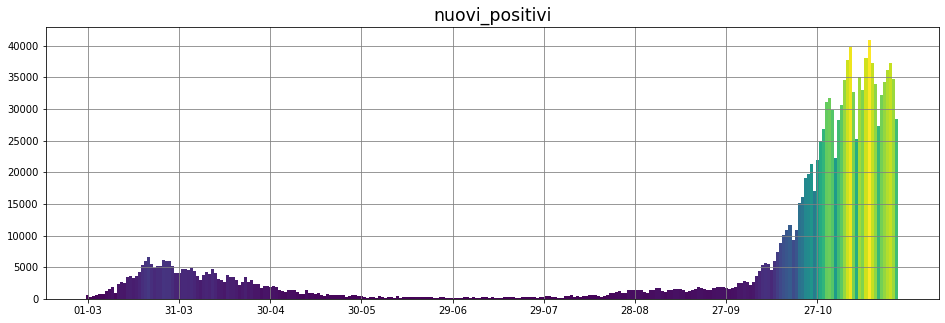

In [10]:
barchart('nuovi_positivi',  'viridis')

### Cumulative Deceised

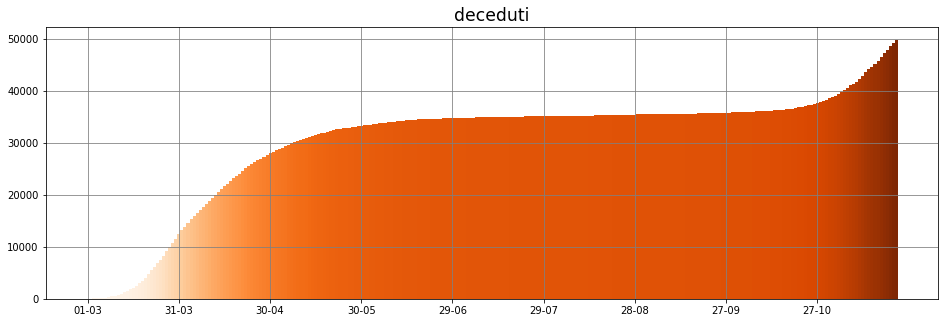

In [12]:
barchart('deceduti', 'Oranges')

### Cumulative Dismissed

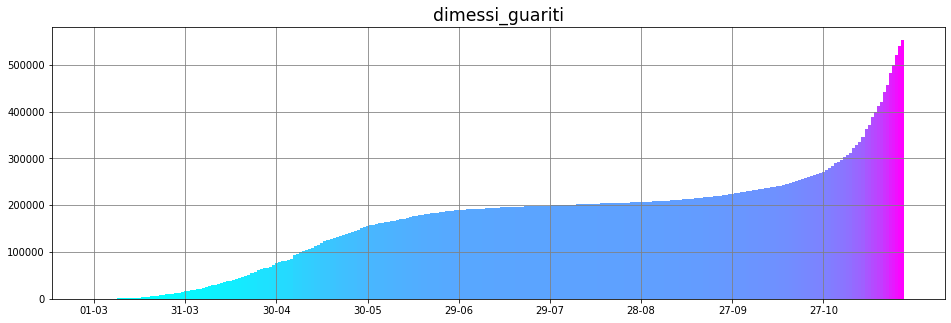

In [13]:
barchart('dimessi_guariti','cool')

### Possible colors

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

### Decesed / day

In [63]:
deceduti = regioni.groupby('data')['deceduti'].sum() 
#ospedalizzati = regioni.groupby('data')['totale_ospedalizzati'].sum() 

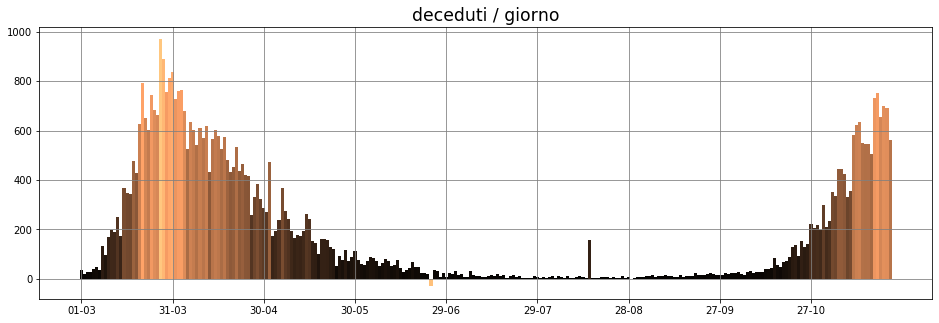

In [73]:
data = np.insert(deceduti.values[1:] - deceduti.values[:-1],0,deceduti[0]) 
color_map = 'copper'
clr = sns.color_palette(color_map , n_colors =1+ data.max())
colors = [clr[x] for x in data]
#labels = [x[8:10]+x[4:7] for x in data.index[[30*i for i in range(1+(data.shape[0]//30))]]]
fg , ax = plt.subplots(figsize = (16,5))
#plt.xticks(ticks= [31*x for x in range(0,1+ospedalizzati.shape[0]//31)],rotation = 45)
plt.grid(color = 'grey')
plt.xticks([30*i for i in range(1+(data.shape[0]//30))] , labels=labels)
plt.bar(np.arange(len(data)) , data, width = 1.0 , color = colors)
plt.title(label= 'deceduti / giorno' , fontdict ={'fontsize':'xx-large'});

# Map plot

In [103]:
#taday is automatically set to yesteday
#gdf[str(today)]

def region_plot(df, day = '2020-11-01' ,save = True):
    
    df.data = pd.to_datetime(df.data)
    df = df.set_index('data')
    df = df[day]
    df = df.groupby('denominazione_regione')['nuovi_positivi'].sum()
    df = italy.merge(df, on ='denominazione_regione')
    gdf = gpd.GeoDataFrame(df, geometry = df.geometry)
    gdf['totale_casi per 1m abitanti'] = 1e6*gdf['nuovi_positivi'] // gdf['popolazione']
    
    fig, ax = plt.subplots(figsize= (12,8))
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Nuovi positivi per 1m abitanti \n {day}')
    
    gdf.plot(column = 'totale_casi per 1m abitanti',
                               cmap = 'inferno',
                               vmax = 1000,
                               vmin = 0,
                               legend =True,
                               ax = ax)
    if save:
        plt.savefig(fname = f'./images/it_cv{day}.png' ,format = 'png')

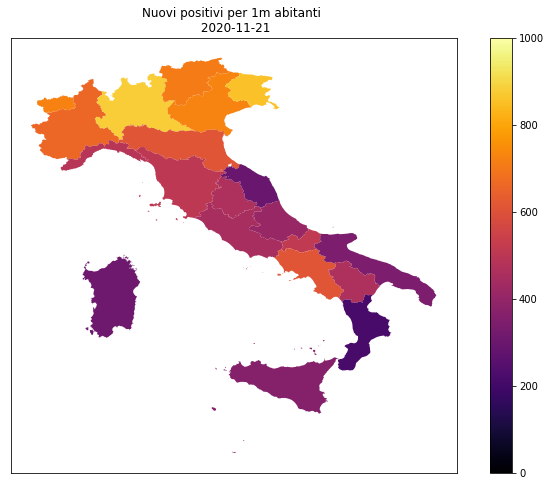

In [104]:
region_plot(regioni , '2020-11-21', save = False)

### Save map images into a gif 

In [143]:
images = []
for d in date_range[-7:]:
    day = str(d.date())
    im  = Image.open(f'./images/it_cv{day}.png')
    images.append(im)
    

In [145]:
images[0].save('./images/sample.gif',
               save_all=True, append_images=images[1:], optimize=False, duration=700, loop=1)

## Positives / Tests

In [92]:
positivi = regioni.groupby(['data','denominazione_regione'])['nuovi_positivi'].sum().unstack()
tamponi = regioni.groupby(['data','denominazione_regione'])['tamponi'].sum().unstack()

In [109]:
def show_im_positivi():
    M = tamponi.iloc[1:,:].values-tamponi.iloc[:-1,:].values
    M = np.insert(M, 0, M[0,:], axis = 0)
    pos_test = 100*(positivi/M)
    pos_test.replace(to_replace= np.inf , value = 0 , inplace = True)
    reg = pos_test.columns.values
    labels = [str(p)[8:10]+'-'+str(p)[5:7] for p in pos_test.index.values[::30]]
    plt.subplots(figsize = (18,5))
    plt.yticks(ticks = np.arange(21) , labels = reg)
    plt.title('Number of positives over Tests in %')
    plt.xticks(ticks = [0,30,60,90,120,150,180,210,240],labels = labels )
    plt.legend(labels = [0,50])

    plt.imshow(pos_test.T ,aspect = 'auto', vmin = 0 , vmax = 50 , cmap = 'viridis')

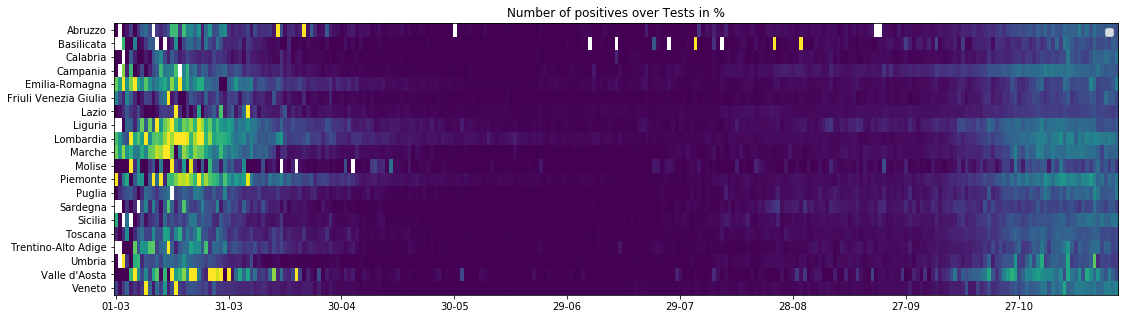

In [110]:
show_im_positivi()